In [20]:
# import magic
# magic.from_file(zip_path, mime=True)

In [21]:
# pip install python-magic

In [22]:
import requests
import zipfile
from pathlib import Path

In [23]:
# Setup path to a data folder
data_path  = Path("data/")
image_path = data_path / "dog_and_cat"
zip_path   = data_path / "dog_and_cat.zip"

In [24]:
if data_path.is_dir():
  print(f"{data_path} directory exists, skipping download")
else:
  print(f"Did not find {data_path} directory, creating one...")
  data_path.mkdir(parents=True, exist_ok=True)

if image_path.is_dir():
  print(f"{image_path} directory exists, skipping download")
else:
  print(f"Did not find {image_path} directory")
  # image_path.mkdir(parents=True, exist_ok=True)

data directory exists, skipping download
data/dog_and_cat directory exists, skipping download


In [25]:
if zip_path.is_file():
  print(f"{zip_path} directory exists, unzip the file")
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("Unzipping...")
    zip_ref.extractall(image_path)
    zip_ref.close()
    print('Success...')
else:
  print(f"{zip_path} do not exists, upload it and then try again")

data/dog_and_cat.zip directory exists, unzip the file
Unzipping...
Success...


In [26]:
import torch
import torch.nn
import torch.optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [27]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [28]:
train_path = data_path / "dog_and_cat/train"
test_path  = data_path / "dog_and_cat/test"

In [29]:
train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

In [30]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [31]:
# Define the model
# use a pre-trained model like ResNet and modify it for binary classification.
model = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(in_features=num_ftrs, out_features=2)
print(f"num_ftrs: {num_ftrs}, model.fc:{model.fc}")

num_ftrs: 512, model.fc:Linear(in_features=512, out_features=2, bias=True)


In [32]:
# Define Loss Function and Optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [35]:
num_epoches = 5
loss_arr = []
# train model
for epoch in range(num_epoches):
  model.train()
  running_loss = 0.0
  for image, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(image)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  loss_divide = running_loss/len(train_loader)
  loss_arr.append(loss_divide)
  print(f"Epoch {epoch}, Loss: {running_loss/len(train_loader)}")

Epoch 0, Loss: 0.1344786017305321
Epoch 1, Loss: 0.07635634578764439
Epoch 2, Loss: 0.05217558383527729
Epoch 3, Loss: 0.04639542868567838
Epoch 4, Loss: 0.028484814748581912


In [36]:
# test model
model.eval()
correct = 0
total   = 0
with torch.inference_mode():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')


Accuracy: 96.42857142857143%


In [37]:
import matplotlib.pyplot as plt

In [39]:
def plot_linear_graph(epoch, loss):
  plt.plot(epoch, loss)
  plt.xlabel('Epoch(s)')
  plt.ylabel('Total Loss')
  plt.title('Loss per epochs')
  plt.grid(True)
  plt.show()

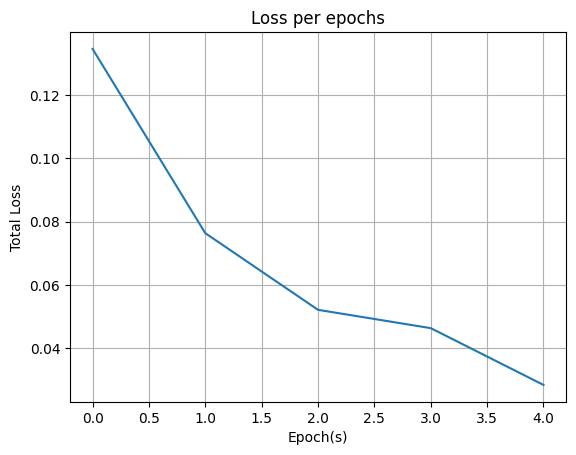

In [40]:
plot_linear_graph(range(num_epoches), loss_arr)

In [41]:
class_names = ['cat', 'dog']

In [42]:
from PIL import Image

In [52]:
def process_image(image_path):
  transformation = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])
  image = Image.open(image_path)
  image = image.convert('RGB')
  image_tensor = transformation(image).unsqueeze(0) # add batch dimension

  return image_tensor

In [53]:
def make_prediction(image_path):
  image_tensor = process_image(image_path)

  model.eval()
  with torch.inference_mode():
    outputs = model(image_tensor)
    _, predicted = torch.max(outputs.data, 1)

  predicted_class = class_names[predicted.item()]

  return predicted_class

In [54]:
cat_img_path = train_path = data_path / "dog_and_cat/cat1.jpg"
print(make_prediction(cat_img_path))
# print(cat_img_path)

cat


In [55]:
dog_img_path = train_path = data_path / "dog_and_cat/dog1.jpg"
print(make_prediction(dog_img_path))

dog
